In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statistics import mean, median, mode, stdev
from prettytable import PrettyTable

In [4]:
df = pd.read_csv('train.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3207 entries, 0 to 3206
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   brand         3207 non-null   object
 1   model         3207 non-null   object
 2   model_year    3207 non-null   int64 
 3   milage        3207 non-null   object
 4   fuel_type     3060 non-null   object
 5   engine        3207 non-null   object
 6   transmission  3207 non-null   object
 7   ext_col       3207 non-null   object
 8   int_col       3207 non-null   object
 9   accident      3118 non-null   object
 10  clean_title   2740 non-null   object
 11  price         3207 non-null   int64 
dtypes: int64(2), object(10)
memory usage: 300.8+ KB


In [52]:
for index,text in enumerate(df['milage'][69:74]):
    print('Carro %d:\n'%(index+1),text)

Carro 1:
 50,648 mi.
Carro 2:
 2,000 mi.
Carro 3:
 24,280 mi.
Carro 4:
 179,700 mi.
Carro 5:
 87,500 mi.


In [37]:
def contar_travessoes_na_coluna(coluna):
    return coluna.apply(lambda x: isinstance(x, str) and x.strip() == '–').sum()


contagem_por_coluna = {}


for coluna in df.columns:
    contagem_por_coluna[coluna] = contar_travessoes_na_coluna(df[coluna])

# Exiba os resultados
print("Contagem de células com apenas travessões em cada coluna:")
print(contagem_por_coluna)

Contagem de células com apenas travessões em cada coluna:
{'brand': 0, 'model': 0, 'model_year': 0, 'milage': 0, 'fuel_type': 38, 'engine': 38, 'transmission': 4, 'ext_col': 11, 'int_col': 98, 'accident': 0, 'clean_title': 0, 'price': 0}


In [38]:
print((df.isnull().any()))

brand           False
model           False
model_year      False
milage          False
fuel_type        True
engine          False
transmission    False
ext_col         False
int_col         False
accident         True
clean_title      True
price           False
dtype: bool


In [39]:
# Verificar se há linhas duplicadas
linhas_duplicadas = df[df.duplicated()]

# Imprimir as linhas duplicadas, se houver
if not linhas_duplicadas.empty:
    print("Linhas duplicadas encontradas:")
    print(linhas_duplicadas)
else:
    print("Não há linhas duplicadas.")

Não há linhas duplicadas.


In [8]:
for col in df.columns:
    distinct_count = df[col].nunique()
    distinct_percentage = (distinct_count / len(df)) * 100
    print(f"Coluna: {col}\nDistinct Count: {distinct_count}\nDistinct Percentage: {distinct_percentage:.2f}%")

Coluna: brand
Distinct Count: 56
Distinct Percentage: 1.75%
Coluna: model
Distinct Count: 1670
Distinct Percentage: 52.07%
Coluna: model_year
Distinct Count: 34
Distinct Percentage: 1.06%
Coluna: milage
Distinct Count: 2325
Distinct Percentage: 72.50%
Coluna: fuel_type
Distinct Count: 7
Distinct Percentage: 0.22%
Coluna: engine
Distinct Count: 1015
Distinct Percentage: 31.65%
Coluna: transmission
Distinct Count: 54
Distinct Percentage: 1.68%
Coluna: ext_col
Distinct Count: 265
Distinct Percentage: 8.26%
Coluna: int_col
Distinct Count: 140
Distinct Percentage: 4.37%
Coluna: accident
Distinct Count: 2
Distinct Percentage: 0.06%
Coluna: clean_title
Distinct Count: 1
Distinct Percentage: 0.03%
Coluna: price
Distinct Count: 1332
Distinct Percentage: 41.53%


In [9]:
for coluna in df.columns:
    valores_unicos = df[coluna].unique()
    valores_unicos_count = df[coluna].nunique()
    print(f'Valores únicos em {coluna} ({valores_unicos_count}): {valores_unicos}')

Valores únicos em brand (56): ['Jeep' 'Toyota' 'Subaru' 'Lexus' 'Ford' 'Nissan' 'MINI' 'Mazda'
 'Mercedes-Benz' 'Dodge' 'Tesla' 'Audi' 'Acura' 'Lincoln' 'Volkswagen'
 'INFINITI' 'RAM' 'Hyundai' 'Rolls-Royce' 'Jaguar' 'Porsche' 'Aston'
 'Maserati' 'Land' 'BMW' 'Honda' 'Kia' 'GMC' 'Chrysler' 'Buick' 'Cadillac'
 'Chevrolet' 'Rivian' 'Pontiac' 'Hummer' 'Mitsubishi' 'Volvo' 'Genesis'
 'Bentley' 'Alfa' 'Lamborghini' 'Ferrari' 'Lotus' 'McLaren' 'Saturn'
 'Saab' 'Lucid' 'FIAT' 'Polestar' 'Scion' 'Maybach' 'smart' 'Bugatti'
 'Mercury' 'Suzuki' 'Karma']
Valores únicos em model (1670): ['Wrangler Sport' 'Highlander XLE' 'Camry Hybrid XLE' ... 'Edge SE'
 'Impreza 2.0i Premium' 'Prelude Type SH']
Valores únicos em model_year (34): [2014 2015 2018 2021 2007 2022 2003 2006 2016 2020 2017 2023 2008 2019
 2013 2012 2001 2011 2010 2004 2002 2005 2009 2000 1998 1996 1999 1993
 1995 1994 1992 1997 2024 1974]
Valores únicos em milage (2325): ['71,000 mi.' '68,575 mi.' '69,641 mi.' ... '76,850 mi.' '74,150 

In [7]:
df["milage"] = df["milage"].replace(",", "", regex=True)
df["milage"] = df["milage"].replace("mi.", "", regex=True)

df['milage'] = df['milage'].astype(int)

print(df)

              brand                        model  model_year  milage  \
0              Jeep               Wrangler Sport        2014   71000   
1            Toyota               Highlander XLE        2015   68575   
2            Toyota             Camry Hybrid XLE        2018   69641   
3            Subaru           Outback Touring XT        2021   33500   
4             Lexus                  GX 460 Base        2018   75000   
...             ...                          ...         ...     ...   
3202           Audi         Q5 2.0T Premium Plus        2016   52105   
3203  Mercedes-Benz              SL-Class SL 550        2014   76850   
3204       Cadillac  Escalade ESV Premium Luxury        2018   74150   
3205           Ford                     Edge SEL        2019   26465   
3206          Honda              Prelude Type SH        2001  125000   

          fuel_type                                             engine  \
0          Gasoline      285.0HP 3.6L V6 Cylinder Engine Gaso

In [41]:
df[['model_year','price','milage']].describe()

model_year         price         milage
count  3207.000000  3.207000e+03    3207.000000
mean   2015.517930  4.487024e+04   64594.983785
std       6.131963  8.382969e+04   52387.260707
min    1974.000000  2.000000e+03     100.000000
25%    2012.000000  1.705000e+04   23151.500000
50%    2017.000000  3.169800e+04   52253.000000
75%    2020.000000  4.999650e+04   93450.000000
max    2024.000000  2.954083e+06  405000.000000

Limite superior: 99416.25


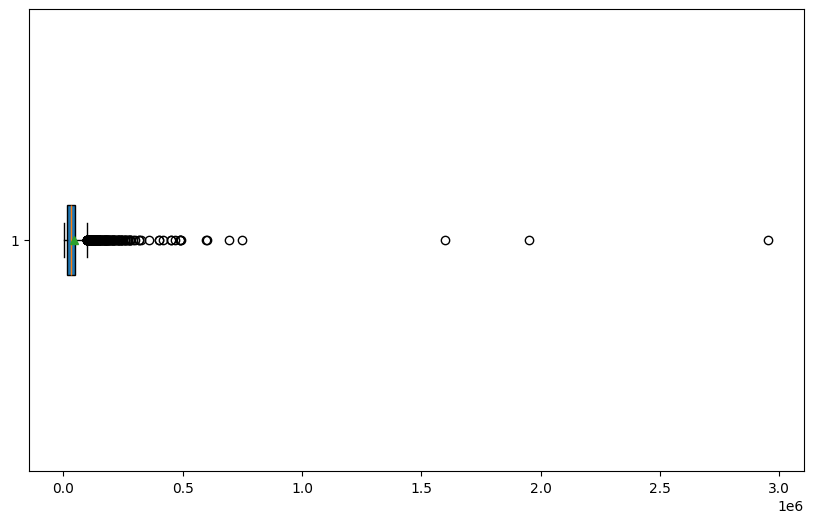

In [12]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["price"], vert=False, patch_artist=True, showmeans=True)

# Calcula o primeiro quartil
q1 = np.percentile(df["price"], 25)

# Calcula o terceiro quartil
q3 = np.percentile(df["price"], 75)

# Calcula o intervalo interquartil
iqr = q3 - q1

# Calcula o limite superior
limite_superior = q3 + 1.5 * iqr

# Calcula o limite inferior
limite_inferior = q1 - 1.5 * iqr

# Imprime as pontas do boxplot
print("Limite superior:", limite_superior)

plt.show()

Limite Inferior: 2000.0


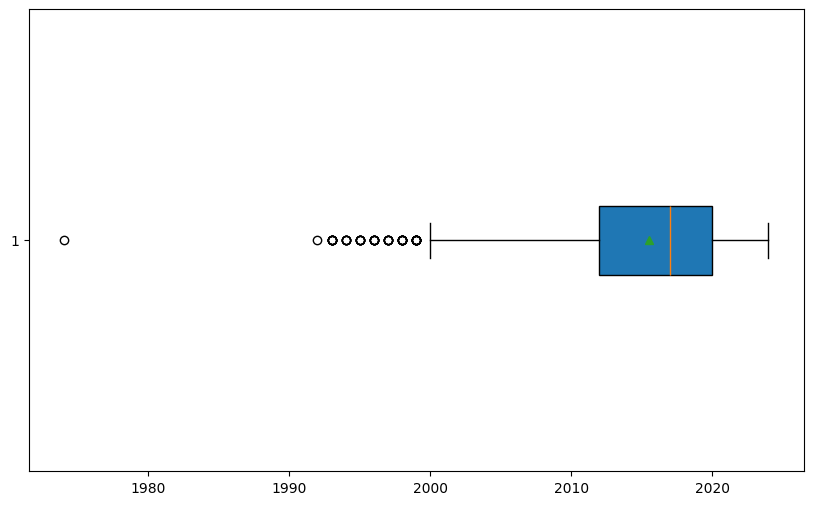

In [88]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["model_year"], vert=False, patch_artist=True, showmeans=True)


q1 = np.percentile(df["model_year"], 25)

q3 = np.percentile(df["model_year"], 75)

iqr = q3 - q1
limite_superior = q1 - 1.5 * iqr
print("Limite Inferior:", limite_superior)

plt.show()

Limite superior: 198897.75


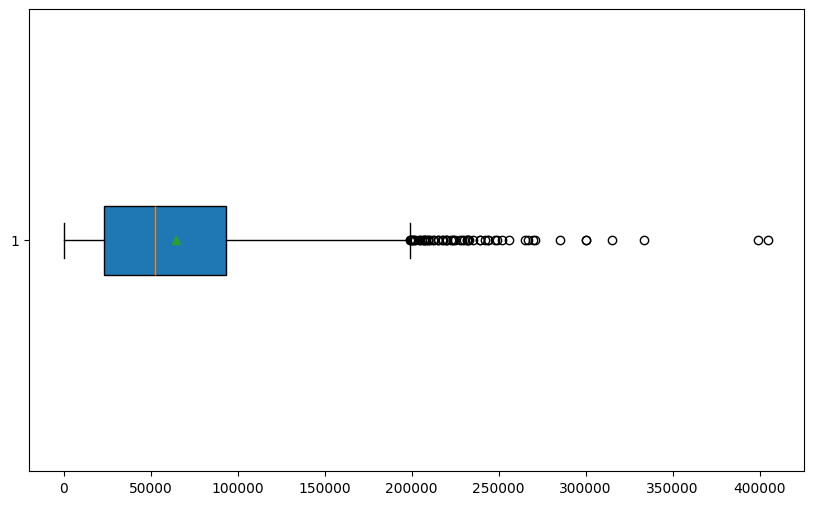

In [89]:
plt.figure(figsize=(10, 6))
plt.boxplot(df["milage"], vert=False, patch_artist=True, showmeans=True)

# Calcula o primeiro quartil
q1 = np.percentile(df["milage"], 25)

# Calcula o terceiro quartil
q3 = np.percentile(df["milage"], 75)

# Calcula o intervalo interquartil
iqr = q3 - q1

# Calcula o limite superior
limite_superior = q3 + 1.5 * iqr

# Calcula o limite inferior
limite_inferior = q1 - 1.5 * iqr

# Imprime as pontas do boxplot
print("Limite superior:", limite_superior)


plt.show()

In [54]:
# Define a function to extract the desired values
def extract_engine_details(engine_string):
    parts = engine_string.split(" ")
    
    horse_power = None
    cc = None
    cylinder = None
    
    for part in parts:
        if 'HP' in part:
            horse_power = part
        elif 'L' in part:
            cc = part
        elif part.isdigit() or (part.startswith('V') and part[1:].isdigit()):
            cylinder = part
            
        if 'Liter' in part:
            cc = None

    return pd.Series({
        "horse_power": horse_power,
        "cc": cc,
        "cylinder": cylinder
    })

# Convert the engine column to string type
df["engine"] = df["engine"].astype(str)

# Extract engine details for each row
df[["horse_power", "cc", "cylinder"]] = df["engine"].apply(extract_engine_details)

df.drop('engine', axis=1, inplace=True) 

# Display the resulting DataFrame
print(df.to_string())

              brand                                                    model  model_year  milage       fuel_type                                                      transmission                                  ext_col                    int_col                                accident clean_title    price horse_power     cc cylinder
0              Jeep                                           Wrangler Sport        2014   71000        Gasoline                                                       5-Speed A/T                                     Gray                      Black                           None reported         Yes    22000     285.0HP   3.6L       V6
1            Toyota                                           Highlander XLE        2015   68575        Gasoline                                                               A/T                                   Silver                       Gray  At least 1 accident or damage reported         Yes    26000     270.0HP   3.5L  

In [55]:
# Remove ".0HP" suffix from the "horse_power" column
df["horse_power"] = df["horse_power"].str.replace(".0HP", "")

# Convert "horse_power" column to integer, handle non-numeric values with errors='coerce'
df["horse_power"] = pd.to_numeric(df["horse_power"], errors='coerce').astype("Int64")

# Display the resulting DataFrame
print(df.to_string())

              brand                                                    model  model_year  milage       fuel_type                                                      transmission                                  ext_col                    int_col                                accident clean_title    price  horse_power     cc cylinder
0              Jeep                                           Wrangler Sport        2014   71000        Gasoline                                                       5-Speed A/T                                     Gray                      Black                           None reported         Yes    22000          285   3.6L       V6
1            Toyota                                           Highlander XLE        2015   68575        Gasoline                                                               A/T                                   Silver                       Gray  At least 1 accident or damage reported         Yes    26000          270   3.5

In [56]:
# Remove ".0HP" suffix from the "horse_power" column
df["cylinder"] = df["cylinder"].str.replace("V", "")

# Convert "horse_power" column to integer, handle non-numeric values with errors='coerce'
df["cylinder"] = pd.to_numeric(df["cylinder"], errors='coerce').astype("Int64")

# Display the resulting DataFrame
print(df.to_string())

              brand                                                    model  model_year  milage       fuel_type                                                      transmission                                  ext_col                    int_col                                accident clean_title    price  horse_power     cc  cylinder
0              Jeep                                           Wrangler Sport        2014   71000        Gasoline                                                       5-Speed A/T                                     Gray                      Black                           None reported         Yes    22000          285   3.6L         6
1            Toyota                                           Highlander XLE        2015   68575        Gasoline                                                               A/T                                   Silver                       Gray  At least 1 accident or damage reported         Yes    26000          270   3

In [90]:
number_of_brands = df['brand'].nunique()
print(number_of_brands)

56


In [91]:
df['brand'].value_counts()

brand
Ford             311
BMW              304
Mercedes-Benz    251
Chevrolet        243
Porsche          163
Audi             146
Toyota           144
Lexus            131
Jeep             108
Land             107
Nissan            94
Cadillac          92
GMC               77
Tesla             75
RAM               74
Dodge             72
Kia               64
Honda             53
Mazda             52
Acura             52
Hyundai           52
Subaru            48
INFINITI          45
Lincoln           44
Volkswagen        43
Jaguar            37
Maserati          28
Bentley           28
MINI              27
Volvo             26
Chrysler          24
Lamborghini       22
Buick             21
Mitsubishi        18
Genesis           18
Alfa              16
Rivian            14
Pontiac           13
Hummer            12
Rolls-Royce        9
Aston              8
Ferrari            8
Saturn             5
FIAT               5
McLaren            5
Lotus              3
Scion              3
Saab   

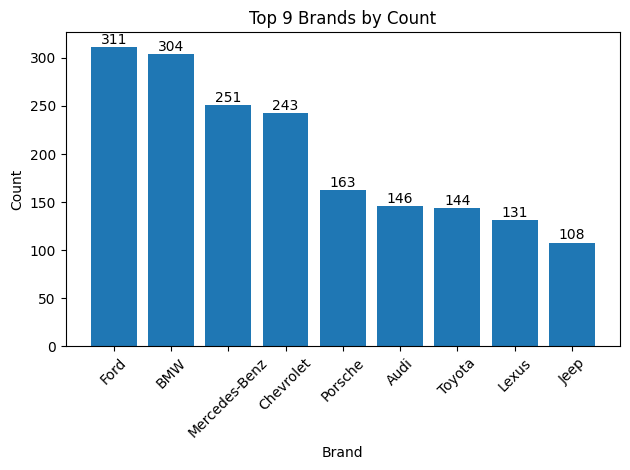

In [30]:
# Find the top 9 brands by count
brand_counts = df["brand"].value_counts().head(9)

# Create a bar chart
bars = plt.bar(brand_counts.index, brand_counts.values)

# Customize the chart
plt.xlabel("Brand")
plt.ylabel("Count")
plt.title("Top 9 Brands by Count")

# Show the chart
for bar, value in zip(bars, brand_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.1, str(value), ha='center', va='bottom')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [57]:
# Lista de marcas a serem mantidas
marcas_manter = ["BMW", "Audi", "Ford", "Mercedes-Benz", "Jeep", "Porsche", "Chevrolet", "Toyota", "Lexus"]

# Aplicar a transformação na coluna 'brand'
df['brand'] = df['brand'].apply(lambda x: x if x in marcas_manter else 'Others')

print(df.to_string())

              brand                                                    model  model_year  milage       fuel_type                                                      transmission                                  ext_col                    int_col                                accident clean_title    price  horse_power     cc  cylinder
0              Jeep                                           Wrangler Sport        2014   71000        Gasoline                                                       5-Speed A/T                                     Gray                      Black                           None reported         Yes    22000          285   3.6L         6
1            Toyota                                           Highlander XLE        2015   68575        Gasoline                                                               A/T                                   Silver                       Gray  At least 1 accident or damage reported         Yes    26000          270   3

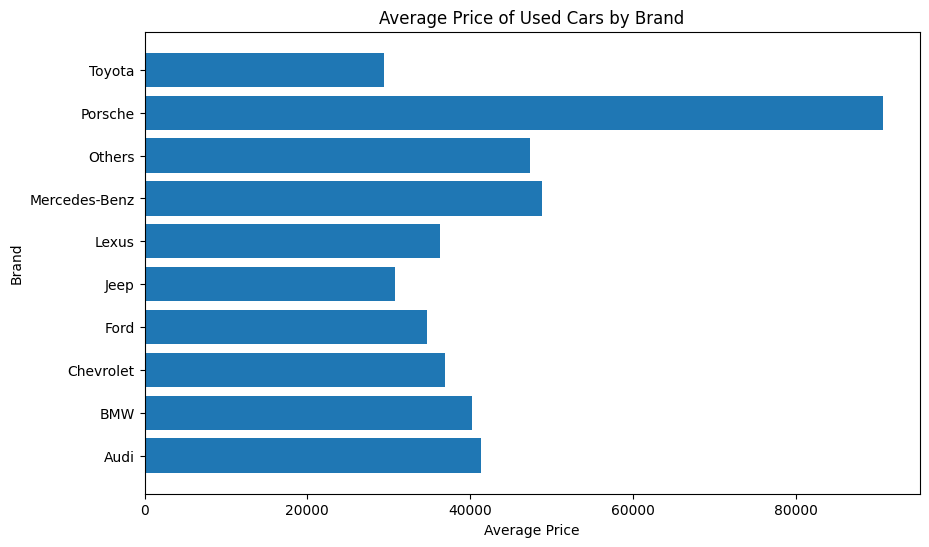

In [94]:
avg_price_by_brand = df.groupby("brand")["price"].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(avg_price_by_brand.index, avg_price_by_brand.values)
plt.xlabel("Average Price")
plt.ylabel("Brand")
plt.title("Average Price of Used Cars by Brand")
plt.show()

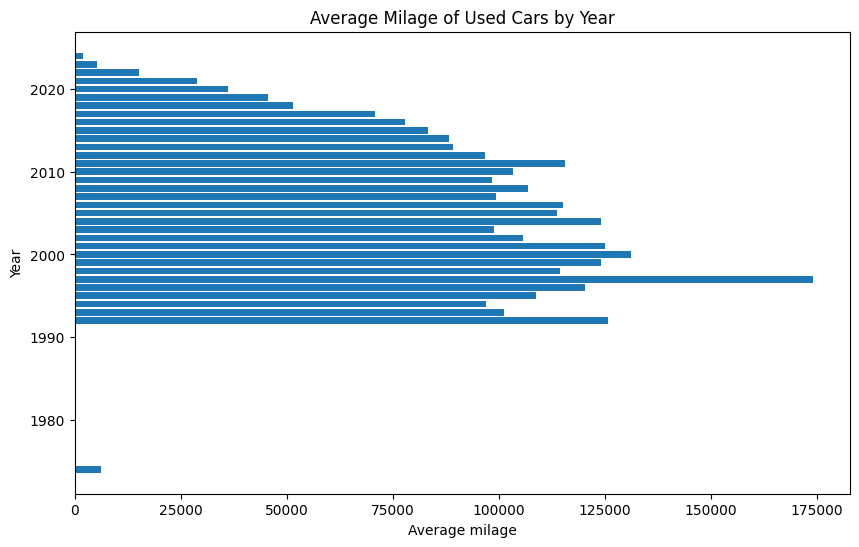

In [95]:
avg_price_by_brand = df.groupby("model_year")["milage"].mean()

# Create the bar chart
plt.figure(figsize=(10, 6))
plt.barh(avg_price_by_brand.index, avg_price_by_brand.values)
plt.xlabel("Average milage")
plt.ylabel("Year")
plt.title("Average Milage of Used Cars by Year")
plt.show()

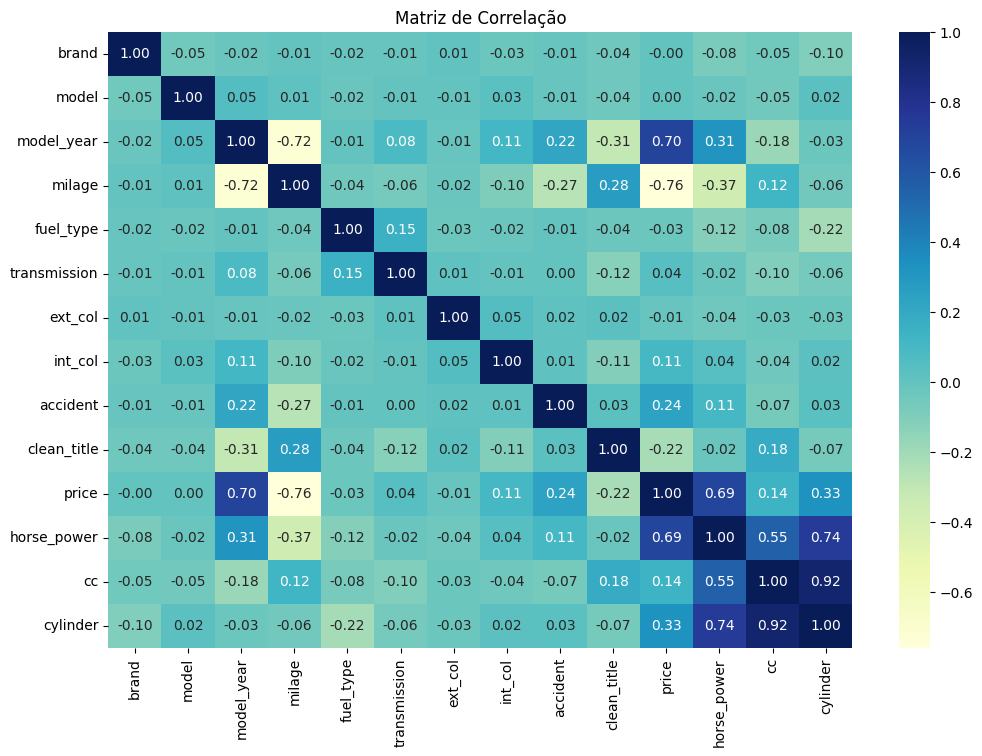

In [46]:
df_matriz = df

# Seleciona apenas as colunas não numéricas
categorical_columns = df_matriz.select_dtypes(include='object').columns

# Mapeia as categorias para números
for column in categorical_columns:
    df_matriz[column] = df_matriz[column].astype('category').cat.codes

# Calcule a matriz de correlação de Spearman
correlation_matrix = df_matriz.corr(method='spearman')

# Visualize a matriz de correlação usando um heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='YlGnBu', fmt=".2f")
plt.title('Matriz de Correlação')
plt.show()

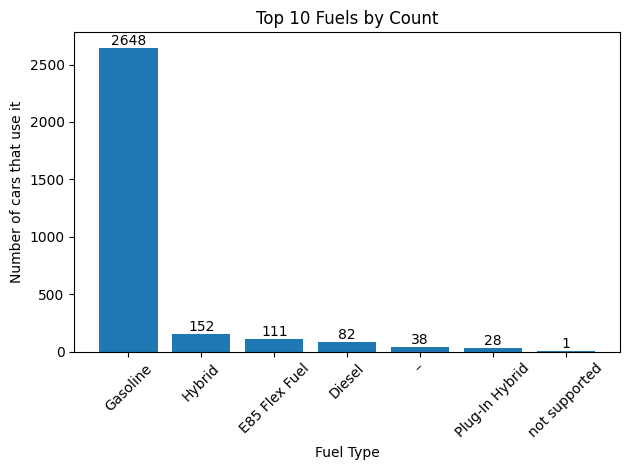

In [96]:
# Find the top 10 fuel type by count
fuel_counts = df["fuel_type"].value_counts().head(10)

# Create a bar chart
bars = plt.bar(fuel_counts.index, fuel_counts.values)

# Customize the chart
plt.xlabel("Fuel Type")
plt.ylabel("Number of cars that use it")
plt.title("Top 10 Fuels by Count")

# Show the chart
for bar, value in zip(bars, fuel_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.1, str(value), ha='center', va='bottom')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

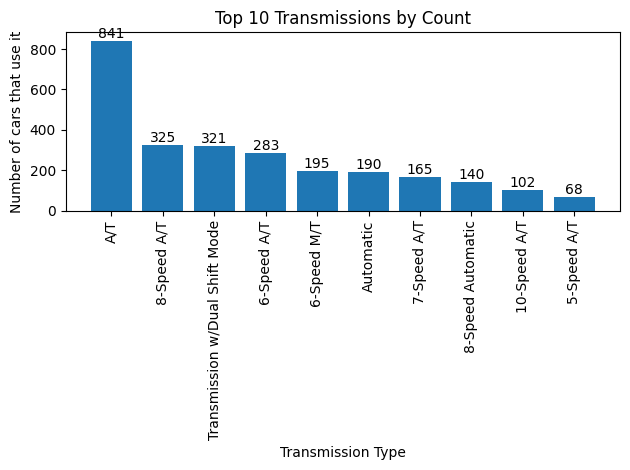

In [97]:
# Find the top 10 fuel type by count
transmission_counts = df["transmission"].value_counts().head(10)

# Create a bar chart
bars = plt.bar(transmission_counts.index, transmission_counts.values)

# Customize the chart
plt.xlabel("Transmission Type")
plt.ylabel("Number of cars that use it")
plt.title("Top 10 Transmissions by Count")

# Show the chart
for bar, value in zip(bars, transmission_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.1, str(value), ha='center', va='bottom')
plt.xticks(rotation=90)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

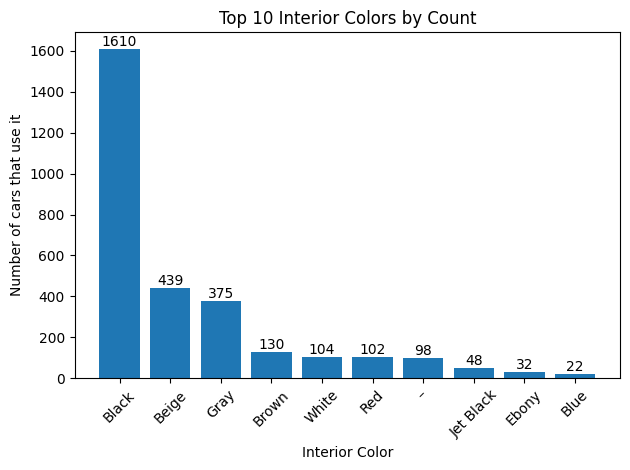

In [98]:
# Find the top 10 fuel type by count
intcolor_counts = df["int_col"].value_counts().head(10)

# Create a bar chart
bars = plt.bar(intcolor_counts.index, intcolor_counts.values)

# Customize the chart
plt.xlabel("Interior Color")
plt.ylabel("Number of cars that use it")
plt.title("Top 10 Interior Colors by Count")

# Show the chart
for bar, value in zip(bars, intcolor_counts):
    plt.text(bar.get_x() + bar.get_width() / 2, value + 0.1, str(value), ha='center', va='bottom')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [5]:
df = df.loc[df['model_year'] >= 2000]

In [8]:
df = df.loc[df['milage'] <= 198898]

In [9]:
df = df.loc[df['price'] <= 99416]

In [58]:
# Mapear os valores para agrupar em 'E85 Flex Fuel', 'Gasoline', 'Hybrid' e 'Others'
mapeamento_fuel_type = {
    'Gasoline': 'Gasoline',
    'Hybrid': 'Hybrid',
    'E85 Flex Fuel': 'E85 Flex Fuel',
    'Diesel': 'Others',
    '–': 'Others',
    'Plug-In Hybrid': 'Hybrid',
    'not supported': 'Others'
}

# Aplicar o mapeamento à coluna 'fuel_type'
df['fuel_type'] = df['fuel_type'].apply(lambda x: mapeamento_fuel_type.get(x, 'Others'))

In [59]:
# Substituir os valores "-" por "Others" na coluna 'engine'
df['engine'] = df['engine'].replace('-', 'Others')


KeyError: 'engine'

In [60]:
# Converte os valores da coluna "transmissão" em valores numéricos
df["transmission_numeric"] = pd.factorize(df["transmission"])[0]

# Agrupar os valores da coluna "transmissão_numerica" em 3 opções
df["transmission"] = pd.qcut(df["transmission_numeric"], 3, labels=["Automatic", "Manual", "Others"])

df.drop('transmission_numeric', axis=1, inplace=True)

# Visualizar os resultados

In [61]:
# Lista de palavras a serem substituídas por versões capitalizadas
palavras_substituicao = ['red', 'black', 'blue', 'white', 'beige', 'gray', 'brown', 'green', 'gold', 'silver', 'yellow', 'orange']

# Agrupar as cores não listadas em 'others'
df['ext_col'] = df['ext_col'].apply(lambda x: x.capitalize() if str(x).lower() in palavras_substituicao else 'Others')

In [62]:
# Lista de palavras a serem substituídas por versões capitalizadas
palavras_substituicao = ['red', 'black', 'blue', 'white', 'beige', 'gray', 'brown', 'green', 'gold', 'silver', 'yellow', 'orange']

# Agrupar as cores não listadas em 'others'
df['int_col'] = df['int_col'].apply(lambda x: x.capitalize() if str(x).lower() in palavras_substituicao else 'Others')

In [63]:
df['accident'] = df['accident'].fillna('None reported')

In [64]:
# Trocar valores nulos por 'No' na coluna 'clean_title'
df['clean_title'] = df['clean_title'].fillna('No')

In [66]:
print(df.to_string())

              brand                                                    model  model_year  milage      fuel_type transmission ext_col int_col                                accident clean_title    price  horse_power     cc  cylinder
0              Jeep                                           Wrangler Sport        2014   71000       Gasoline    Automatic    Gray   Black                           None reported         Yes    22000          285   3.6L         6
1            Toyota                                           Highlander XLE        2015   68575       Gasoline    Automatic  Silver    Gray  At least 1 accident or damage reported         Yes    26000          270   3.5L         6
2            Toyota                                         Camry Hybrid XLE        2018   69641         Hybrid    Automatic   White   Black  At least 1 accident or damage reported         Yes    23995          208   2.5L         4
3            Others                                       Outback Tourin

In [110]:
df[['model_year','price','milage']].describe()

model_year         price         milage
count  2904.000000   2904.000000    2904.000000
mean   2015.758609  34323.280647   64005.247245
std       5.509263  21179.586527   46337.138808
min    2000.000000   2000.000000     100.000000
25%    2013.000000  17500.000000   26000.000000
50%    2017.000000  30351.000000   54141.000000
75%    2020.000000  46139.750000   92895.750000
max    2024.000000  99000.000000  198868.000000

In [116]:
def contar_travessoes_na_coluna(coluna):
    return coluna.apply(lambda x: isinstance(x, str) and x.strip() == '–').sum()


contagem_por_coluna = {}


for coluna in df.columns:
    contagem_por_coluna[coluna] = contar_travessoes_na_coluna(df[coluna])

# Exiba os resultados
print("Contagem de células com apenas travessões em cada coluna:")
print(contagem_por_coluna)

Contagem de células com apenas travessões em cada coluna:
{'brand': 0, 'model': 0, 'model_year': 0, 'milage': 0, 'fuel_type': 0, 'engine': 13, 'transmission': 0, 'ext_col': 0, 'int_col': 0, 'accident': 0, 'clean_title': 0, 'price': 0, 'transmission_numeric': 0}


In [71]:
df.to_csv('cleaned_data_without_outliers.csv', index=False)


In [ ]:
df.to_csv('cleaned_data_with_outliers.csv', index=False)

In [10]:
df2 = df["price"].mean()
print(df2)

34323.28064738292
